<a href="https://colab.research.google.com/github/Praneet460/AutoML_Projects/blob/master/Automl_H20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AUTOML Churn Prediction with GPU RunTime

In [1]:
#this command might be relevant ony on GPU nodes. But the notebook will run on CPU as well
#If running on CPU remove the command wherever it appears
!nvidia-smi

Thu Jul  9 15:28:13 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
openjdk version "11.0.7" 2020-04-14
OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)


In [3]:
!pip install h2o

     |████████████████████████████████| 128.4MB 84kB/s 
  Created wheel for h2o: filename=h2o-3.30.0.6-py2.py3-none-any.whl size=128412300 sha256=ea7d359b952ae3c1bac1d945793b474a23809d7a4af3976fc41e83d2bb743893
  Stored in directory: /root/.cache/pip/wheels/de/4c/dd/4813e95c4b5328b4de2e2e1aa56ca66a547f45d11fe47c3c8a
Successfully built h2o


In [4]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpwe3f2fes
  JVM stdout: /tmp/tmpwe3f2fes/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpwe3f2fes/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.6
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_unknownUser_d34d93
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [5]:
from h2o.automl import H2OAutoML
churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
churn_df.types

{'Churn': 'enum',
 'Contract': 'enum',
 'Dependents': 'enum',
 'DeviceProtection': 'enum',
 'InternetService': 'enum',
 'MonthlyCharges': 'real',
 'MultipleLines': 'enum',
 'OnlineBackup': 'enum',
 'OnlineSecurity': 'enum',
 'PaperlessBilling': 'enum',
 'Partner': 'enum',
 'PaymentMethod': 'enum',
 'PhoneService': 'enum',
 'SeniorCitizen': 'int',
 'StreamingMovies': 'enum',
 'StreamingTV': 'enum',
 'TechSupport': 'enum',
 'TotalCharges': 'real',
 'customerID': 'string',
 'gender': 'enum',
 'tenure': 'int'}

In [7]:
churn_df.describe()

Rows:7043
Cols:21




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [8]:

churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])

In [9]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.7,5036.3,Yes
5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.5,2686.05,No


In [10]:
y = "Churn"
x = churn_df.columns
x.remove(y)
x.remove("customerID")

In [11]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [12]:
!nvidia-smi

Thu Jul  9 15:31:50 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [13]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
15:31:55.728: Project: AutoML_20200709_153155721
15:31:55.729: Cross-validation disabled by user: no fold column nor nfolds > 1.
15:31:55.730: Setting stopping tolerance adaptively based on the training frame: 0.014204774743178402
15:31:55.730: Build control seed: 10
15:31:55.731: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
15:31:55.839: training frame: Frame key: automl_training_py_2_sid_a3fd    cols: 21    rows: 4475  chunks: 8    size: 295823  checksum: -5996543432844217365
15:31:55.840: validation frame: Frame key: py_4_sid_a3fd    cols: 21    rows: 1003  chunks: 8    size: 137197  checksum: -5350165876064597272
15:31:55.851: leaderboard frame: Frame key: automl_leaderboard_py_2_sid_a3fd    cols: 21    rows: 481  chunks: 8    size: 124601  checksum: -9065721100229907533
15:31:55.851: blending frame: NULL
15:31:55.851: response column: Churn

In [14]:
!nvidia-smi

Thu Jul  9 15:32:48 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    54W / 149W |     74MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [15]:
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_5_AutoML_20200709_153155,0.837171,0.447737,0.670349,0.213048,0.382354,0.146195
GLM_1_AutoML_20200709_153155,0.836118,0.446972,0.683123,0.245995,0.382454,0.146271
GBM_4_AutoML_20200709_153155,0.83179,0.454512,0.664891,0.24539,0.385793,0.148836
GBM_3_AutoML_20200709_153155,0.831571,0.455073,0.655977,0.235617,0.384627,0.147938
GBM_2_AutoML_20200709_153155,0.830935,0.453378,0.648813,0.228358,0.385634,0.148714
GBM_1_AutoML_20200709_153155,0.82937,0.453069,0.67823,0.240811,0.385519,0.148625
DRF_1_AutoML_20200709_153155,0.824562,0.585013,0.643899,0.239946,0.387411,0.150087
XGBoost_3_AutoML_20200709_153155,0.822705,0.468282,0.646288,0.247904,0.389904,0.152025
XGBoost_2_AutoML_20200709_153155,0.819775,0.477931,0.631054,0.23156,0.392633,0.154161
XGBoost_1_AutoML_20200709_153155,0.809887,0.493903,0.639443,0.259752,0.399356,0.159485


In [16]:
churn_pred=aml.leader.predict(churn_test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [17]:
churn_pred.head()

predict,No,Yes
Yes,0.135697,0.864303
No,0.986609,0.0133911
No,0.78181,0.21819
Yes,0.200627,0.799373
No,0.811348,0.188652
Yes,0.227922,0.772078
No,0.845314,0.154686
No,0.961487,0.0385132
No,0.983035,0.016965
No,0.796572,0.203428


In [18]:
aml.leader.model_performance(churn_test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.13942287743593645
RMSE: 0.3733937297758714
LogLoss: 0.42361591342688715
Mean Per-Class Error: 0.2299675424569797
AUC: 0.8386743108730602
AUCPR: 0.6625862712652963
Gini: 0.6773486217461204

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22590047428657245: 


,,No,Yes,Error,Rate
0,No,545.0,248.0,0.3127,(248.0/793.0)
1,Yes,43.0,248.0,0.1478,(43.0/291.0)
2,Total,588.0,496.0,0.2685,(291.0/1084.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.225900,0.630241,253.0
1,max f2,0.208426,0.752528,263.0
2,max f0point5,0.563026,0.620757,105.0
3,max accuracy,0.563026,0.797048,105.0
4,max precision,0.894326,1.000000,0.0
5,max recall,0.012532,1.000000,397.0
6,max specificity,0.894326,1.000000,0.0
7,max absolute_mcc,0.218285,0.479907,257.0
8,max min_per_class_accuracy,0.281221,0.746532,222.0
9,max mean_per_class_accuracy,0.218285,0.770032,257.0



Gains/Lift Table: Avg response rate: 26.85 %, avg score: 27.02 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010148,0.869714,3.386442,3.386442,0.909091,0.882018,0.909091,0.882018,0.034364,0.034364,238.644174,238.644174,0.033103
1,2,0.020295,0.845014,3.386442,3.386442,0.909091,0.853043,0.909091,0.867531,0.034364,0.068729,238.644174,238.644174,0.066206
2,3,0.030443,0.831267,3.386442,3.386442,0.909091,0.840470,0.909091,0.858511,0.034364,0.103093,238.644174,238.644174,0.099310
3,4,0.040590,0.804007,3.386442,3.386442,0.909091,0.815553,0.909091,0.847771,0.034364,0.137457,238.644174,238.644174,0.132413
4,5,0.050738,0.792009,3.725086,3.454171,1.000000,0.797905,0.927273,0.837798,0.037801,0.175258,272.508591,245.417057,0.170214
5,6,0.100554,0.677382,2.069492,2.768183,0.555556,0.735679,0.743119,0.787207,0.103093,0.278351,106.949217,176.818311,0.243042
6,7,0.150369,0.594854,2.414408,2.650981,0.648148,0.639410,0.711656,0.738244,0.120275,0.398625,141.440753,165.098138,0.339357
7,8,0.200185,0.498815,1.655594,2.403281,0.444444,0.553439,0.645161,0.692256,0.082474,0.481100,65.559374,140.328123,0.384000
8,9,0.299815,0.358414,1.621102,2.143357,0.435185,0.428965,0.575385,0.604762,0.161512,0.642612,62.110220,114.335712,0.468589
9,10,0.400369,0.270487,1.298654,1.931208,0.348624,0.310889,0.518433,0.530955,0.130584,0.773196,29.865380,93.120813,0.509640


In [19]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
model_ids

['GBM_5_AutoML_20200709_153155',
 'GLM_1_AutoML_20200709_153155',
 'GBM_4_AutoML_20200709_153155',
 'GBM_3_AutoML_20200709_153155',
 'GBM_2_AutoML_20200709_153155',
 'GBM_1_AutoML_20200709_153155',
 'DRF_1_AutoML_20200709_153155',
 'XGBoost_3_AutoML_20200709_153155',
 'XGBoost_2_AutoML_20200709_153155',
 'XGBoost_1_AutoML_20200709_153155']

In [20]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_20200709_153155


Model Summary: 


,,number_of_trees
0,,35.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10298611311710579
RMSE: 0.32091449502492997
LogLoss: 0.32537670563087906
Mean Per-Class Error: 0.16648072130785607
AUC: 0.9163788900314208
AUCPR: 0.8023454176669621
Gini: 0.8327577800628416

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3750518560409546: 


,,No,Yes,Error,Rate
0,No,2859.0,424.0,0.1292,(424.0/3283.0)
1,Yes,259.0,933.0,0.2173,(259.0/1192.0)
2,Total,3118.0,1357.0,0.1526,(683.0/4475.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.375052,0.732052,198.0
1,max f2,0.206739,0.814246,268.0
2,max f0point5,0.598896,0.748567,117.0
3,max accuracy,0.504215,0.853408,152.0
4,max precision,0.954964,1.000000,0.0
5,max recall,0.008920,1.000000,390.0
6,max specificity,0.954964,1.000000,0.0
7,max absolute_mcc,0.375052,0.628545,198.0
8,max min_per_class_accuracy,0.316752,0.830947,222.0
9,max mean_per_class_accuracy,0.265103,0.833519,242.0



Gains/Lift Table: Avg response rate: 26.64 %, avg score: 26.63 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010279,0.917061,3.754195,3.754195,1.000000,0.930672,1.000000,0.930672,0.038591,0.038591,275.419463,275.419463,0.038591
1,2,0.020112,0.891867,3.583549,3.670768,0.954545,0.903628,0.977778,0.917450,0.035235,0.073826,258.354942,267.076808,0.073216
2,3,0.030168,0.865479,3.503915,3.615150,0.933333,0.879374,0.962963,0.904758,0.035235,0.109060,250.391499,261.515039,0.107537
3,4,0.040000,0.841256,3.498227,3.586409,0.931818,0.853379,0.955307,0.892129,0.034396,0.143456,249.822682,258.640940,0.141020
4,5,0.050056,0.816229,3.253635,3.519557,0.866667,0.827626,0.937500,0.879171,0.032718,0.176174,225.363535,251.955747,0.171910
5,6,0.100112,0.711802,3.217881,3.368719,0.857143,0.765116,0.897321,0.822143,0.161074,0.337248,221.788111,236.871929,0.323237
6,7,0.150168,0.620188,2.899445,3.212295,0.772321,0.665725,0.855655,0.770004,0.145134,0.482383,189.944496,221.229451,0.452836
7,8,0.200000,0.537522,2.222214,2.965604,0.591928,0.580702,0.789944,0.722837,0.110738,0.593121,122.221386,196.560403,0.535856
8,9,0.300112,0.379743,1.818438,2.582931,0.484375,0.456891,0.688012,0.634122,0.182047,0.775168,81.843802,158.293063,0.647541
9,10,0.400000,0.249795,1.108621,2.214765,0.295302,0.311333,0.589944,0.553515,0.110738,0.885906,10.862123,121.476510,0.662330




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.13078309989799505
RMSE: 0.3616394612013394
LogLoss: 0.41198260000260617
Mean Per-Class Error: 0.21559959075978674
AUC: 0.8452291206720155
AUCPR: 0.6369029663127437
Gini: 0.690458241344031

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3127404451370239: 


,,No,Yes,Error,Rate
0,No,602.0,156.0,0.2058,(156.0/758.0)
1,Yes,56.0,189.0,0.2286,(56.0/245.0)
2,Total,658.0,345.0,0.2114,(212.0/1003.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.312740,0.640678,215.0
1,max f2,0.178259,0.745704,273.0
2,max f0point5,0.503098,0.617778,141.0
3,max accuracy,0.503098,0.813559,141.0
4,max precision,0.962781,1.000000,0.0
5,max recall,0.002555,1.000000,398.0
6,max specificity,0.962781,1.000000,0.0
7,max absolute_mcc,0.312740,0.511591,215.0
8,max min_per_class_accuracy,0.303756,0.779592,219.0
9,max mean_per_class_accuracy,0.256393,0.784400,241.0



Gains/Lift Table: Avg response rate: 24.43 %, avg score: 26.55 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010967,0.920025,3.349536,3.349536,0.818182,0.933156,0.818182,0.933156,0.036735,0.036735,234.953618,234.953618,0.034096
1,2,0.020937,0.907343,4.093878,3.703984,1.000000,0.913929,0.904762,0.924000,0.040816,0.077551,309.387755,270.398445,0.074912
2,3,0.030907,0.880506,3.275102,3.565635,0.800000,0.892328,0.870968,0.913783,0.032653,0.110204,227.510204,256.563529,0.104927
3,4,0.040877,0.855420,2.046939,3.195222,0.500000,0.864826,0.780488,0.901843,0.020408,0.130612,104.693878,219.522150,0.118739
4,5,0.051844,0.821618,2.977365,3.149137,0.727273,0.836872,0.769231,0.888099,0.032653,0.163265,197.736549,214.913658,0.147434
5,6,0.100698,0.722719,2.590004,2.877874,0.632653,0.774342,0.702970,0.832910,0.126531,0.289796,159.000416,187.787432,0.250218
6,7,0.150548,0.631072,2.374449,2.711177,0.580000,0.681609,0.662252,0.782810,0.118367,0.408163,137.444898,171.117719,0.340881
7,8,0.200399,0.537341,2.128816,2.566311,0.520000,0.589060,0.626866,0.734614,0.106122,0.514286,112.881633,156.631130,0.415341
8,9,0.300100,0.360975,1.842245,2.325758,0.450000,0.450447,0.568106,0.640206,0.183673,0.697959,84.224490,132.575768,0.526455
9,10,0.399801,0.258557,1.310041,2.072462,0.320000,0.307913,0.506234,0.557340,0.130612,0.828571,31.004082,107.246170,0.567358




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-07-09 15:32:04,0.008 sec,0.0,0.500000,0.693147,0.500000,0.266369,1.000000,0.733631,0.500000,0.693147,0.500000,0.244267,1.000000,0.755733
1,,2020-07-09 15:32:04,0.268 sec,5.0,0.363065,0.422744,0.871986,0.709915,3.503915,0.202905,0.362261,0.422646,0.854903,0.662780,4.093878,0.185444
2,,2020-07-09 15:32:04,0.378 sec,10.0,0.347875,0.379923,0.883188,0.731475,3.490742,0.186369,0.354732,0.396571,0.855159,0.664489,4.093878,0.197408
3,,2020-07-09 15:32:04,0.524 sec,15.0,0.340682,0.363003,0.892266,0.748444,3.587342,0.195531,0.356794,0.398544,0.852822,0.652492,4.093878,0.207378
4,,2020-07-09 15:32:05,0.646 sec,20.0,0.334353,0.350647,0.900372,0.766914,3.587342,0.175866,0.357944,0.401340,0.851483,0.646320,3.752721,0.193420
5,,2020-07-09 15:32:05,0.758 sec,25.0,0.330021,0.341946,0.906040,0.778293,3.503915,0.162235,0.360733,0.407688,0.846589,0.645002,4.093878,0.214357
6,,2020-07-09 15:32:05,0.887 sec,30.0,0.325346,0.333387,0.911341,0.791819,3.670768,0.154860,0.360878,0.408922,0.845851,0.642918,4.093878,0.205384
7,,2020-07-09 15:32:05,1.035 sec,35.0,0.320914,0.325377,0.916379,0.802345,3.754195,0.152626,0.361639,0.411983,0.845229,0.636903,3.349536,0.211366



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,tenure,661.152710,1.000000,0.168545
1,Contract.Month-to-month,532.396240,0.805255,0.135721
2,TotalCharges,505.269867,0.764226,0.128806
3,MonthlyCharges,480.169891,0.726262,0.122408
4,TechSupport.No,395.401489,0.598049,0.100798
5,OnlineSecurity.No,287.621887,0.435031,0.073322
6,PaymentMethod.Electroniccheck,131.027802,0.198181,0.033402
7,Contract.Twoyear,86.310379,0.130545,0.022003
8,InternetService.DSL,85.870758,0.129880,0.021891
9,OnlineBackup.No,66.718201,0.100912,0.017008



See the whole table with table.as_data_frame()


In [22]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

out.params

{'backend': {'actual': 'auto', 'default': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False},
 'calibrate_model': {'actual': False, 'default': False},
 'calibration_frame': {'actual': None, 'default': None},
 'categorical_encoding': {'actual': 'AUTO', 'default': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0},
 'distribution': {'actual': 'bernoulli', 'default': 'AUTO'},
 'dmatrix_type': {'actual': 'auto', 'default': 'auto'},
 'eta': {'actual': 0.3, 'default': 0.3},
 'export_checkpoints_dir': {'actual': None, 'default': None},
 'fold_assignment': {'actual': 'AUTO', 'default': 'AUTO'},
 'fold_column': {'actual': None, 'default': None},
 'gainslift_bins': {'actual': -1, 'default': -1},
 

In [24]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_20200709_153155


Model Summary: 


,,number_of_trees
0,,35.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10298611311710579
RMSE: 0.32091449502492997
LogLoss: 0.32537670563087906
Mean Per-Class Error: 0.16648072130785607
AUC: 0.9163788900314208
AUCPR: 0.8023454176669621
Gini: 0.8327577800628416

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3750518560409546: 


,,No,Yes,Error,Rate
0,No,2859.0,424.0,0.1292,(424.0/3283.0)
1,Yes,259.0,933.0,0.2173,(259.0/1192.0)
2,Total,3118.0,1357.0,0.1526,(683.0/4475.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.375052,0.732052,198.0
1,max f2,0.206739,0.814246,268.0
2,max f0point5,0.598896,0.748567,117.0
3,max accuracy,0.504215,0.853408,152.0
4,max precision,0.954964,1.000000,0.0
5,max recall,0.008920,1.000000,390.0
6,max specificity,0.954964,1.000000,0.0
7,max absolute_mcc,0.375052,0.628545,198.0
8,max min_per_class_accuracy,0.316752,0.830947,222.0
9,max mean_per_class_accuracy,0.265103,0.833519,242.0



Gains/Lift Table: Avg response rate: 26.64 %, avg score: 26.63 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010279,0.917061,3.754195,3.754195,1.000000,0.930672,1.000000,0.930672,0.038591,0.038591,275.419463,275.419463,0.038591
1,2,0.020112,0.891867,3.583549,3.670768,0.954545,0.903628,0.977778,0.917450,0.035235,0.073826,258.354942,267.076808,0.073216
2,3,0.030168,0.865479,3.503915,3.615150,0.933333,0.879374,0.962963,0.904758,0.035235,0.109060,250.391499,261.515039,0.107537
3,4,0.040000,0.841256,3.498227,3.586409,0.931818,0.853379,0.955307,0.892129,0.034396,0.143456,249.822682,258.640940,0.141020
4,5,0.050056,0.816229,3.253635,3.519557,0.866667,0.827626,0.937500,0.879171,0.032718,0.176174,225.363535,251.955747,0.171910
5,6,0.100112,0.711802,3.217881,3.368719,0.857143,0.765116,0.897321,0.822143,0.161074,0.337248,221.788111,236.871929,0.323237
6,7,0.150168,0.620188,2.899445,3.212295,0.772321,0.665725,0.855655,0.770004,0.145134,0.482383,189.944496,221.229451,0.452836
7,8,0.200000,0.537522,2.222214,2.965604,0.591928,0.580702,0.789944,0.722837,0.110738,0.593121,122.221386,196.560403,0.535856
8,9,0.300112,0.379743,1.818438,2.582931,0.484375,0.456891,0.688012,0.634122,0.182047,0.775168,81.843802,158.293063,0.647541
9,10,0.400000,0.249795,1.108621,2.214765,0.295302,0.311333,0.589944,0.553515,0.110738,0.885906,10.862123,121.476510,0.662330




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.13078309989799505
RMSE: 0.3616394612013394
LogLoss: 0.41198260000260617
Mean Per-Class Error: 0.21559959075978674
AUC: 0.8452291206720155
AUCPR: 0.6369029663127437
Gini: 0.690458241344031

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3127404451370239: 


,,No,Yes,Error,Rate
0,No,602.0,156.0,0.2058,(156.0/758.0)
1,Yes,56.0,189.0,0.2286,(56.0/245.0)
2,Total,658.0,345.0,0.2114,(212.0/1003.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.312740,0.640678,215.0
1,max f2,0.178259,0.745704,273.0
2,max f0point5,0.503098,0.617778,141.0
3,max accuracy,0.503098,0.813559,141.0
4,max precision,0.962781,1.000000,0.0
5,max recall,0.002555,1.000000,398.0
6,max specificity,0.962781,1.000000,0.0
7,max absolute_mcc,0.312740,0.511591,215.0
8,max min_per_class_accuracy,0.303756,0.779592,219.0
9,max mean_per_class_accuracy,0.256393,0.784400,241.0



Gains/Lift Table: Avg response rate: 24.43 %, avg score: 26.55 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010967,0.920025,3.349536,3.349536,0.818182,0.933156,0.818182,0.933156,0.036735,0.036735,234.953618,234.953618,0.034096
1,2,0.020937,0.907343,4.093878,3.703984,1.000000,0.913929,0.904762,0.924000,0.040816,0.077551,309.387755,270.398445,0.074912
2,3,0.030907,0.880506,3.275102,3.565635,0.800000,0.892328,0.870968,0.913783,0.032653,0.110204,227.510204,256.563529,0.104927
3,4,0.040877,0.855420,2.046939,3.195222,0.500000,0.864826,0.780488,0.901843,0.020408,0.130612,104.693878,219.522150,0.118739
4,5,0.051844,0.821618,2.977365,3.149137,0.727273,0.836872,0.769231,0.888099,0.032653,0.163265,197.736549,214.913658,0.147434
5,6,0.100698,0.722719,2.590004,2.877874,0.632653,0.774342,0.702970,0.832910,0.126531,0.289796,159.000416,187.787432,0.250218
6,7,0.150548,0.631072,2.374449,2.711177,0.580000,0.681609,0.662252,0.782810,0.118367,0.408163,137.444898,171.117719,0.340881
7,8,0.200399,0.537341,2.128816,2.566311,0.520000,0.589060,0.626866,0.734614,0.106122,0.514286,112.881633,156.631130,0.415341
8,9,0.300100,0.360975,1.842245,2.325758,0.450000,0.450447,0.568106,0.640206,0.183673,0.697959,84.224490,132.575768,0.526455
9,10,0.399801,0.258557,1.310041,2.072462,0.320000,0.307913,0.506234,0.557340,0.130612,0.828571,31.004082,107.246170,0.567358




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-07-09 15:32:04,0.008 sec,0.0,0.500000,0.693147,0.500000,0.266369,1.000000,0.733631,0.500000,0.693147,0.500000,0.244267,1.000000,0.755733
1,,2020-07-09 15:32:04,0.268 sec,5.0,0.363065,0.422744,0.871986,0.709915,3.503915,0.202905,0.362261,0.422646,0.854903,0.662780,4.093878,0.185444
2,,2020-07-09 15:32:04,0.378 sec,10.0,0.347875,0.379923,0.883188,0.731475,3.490742,0.186369,0.354732,0.396571,0.855159,0.664489,4.093878,0.197408
3,,2020-07-09 15:32:04,0.524 sec,15.0,0.340682,0.363003,0.892266,0.748444,3.587342,0.195531,0.356794,0.398544,0.852822,0.652492,4.093878,0.207378
4,,2020-07-09 15:32:05,0.646 sec,20.0,0.334353,0.350647,0.900372,0.766914,3.587342,0.175866,0.357944,0.401340,0.851483,0.646320,3.752721,0.193420
5,,2020-07-09 15:32:05,0.758 sec,25.0,0.330021,0.341946,0.906040,0.778293,3.503915,0.162235,0.360733,0.407688,0.846589,0.645002,4.093878,0.214357
6,,2020-07-09 15:32:05,0.887 sec,30.0,0.325346,0.333387,0.911341,0.791819,3.670768,0.154860,0.360878,0.408922,0.845851,0.642918,4.093878,0.205384
7,,2020-07-09 15:32:05,1.035 sec,35.0,0.320914,0.325377,0.916379,0.802345,3.754195,0.152626,0.361639,0.411983,0.845229,0.636903,3.349536,0.211366



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,tenure,661.152710,1.000000,0.168545
1,Contract.Month-to-month,532.396240,0.805255,0.135721
2,TotalCharges,505.269867,0.764226,0.128806
3,MonthlyCharges,480.169891,0.726262,0.122408
4,TechSupport.No,395.401489,0.598049,0.100798
5,OnlineSecurity.No,287.621887,0.435031,0.073322
6,PaymentMethod.Electroniccheck,131.027802,0.198181,0.033402
7,Contract.Twoyear,86.310379,0.130545,0.022003
8,InternetService.DSL,85.870758,0.129880,0.021891
9,OnlineBackup.No,66.718201,0.100912,0.017008



See the whole table with table.as_data_frame()


In [25]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [26]:
out.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3750518560409546: 


,,No,Yes,Error,Rate
0,No,2859.0,424.0,0.1292,(424.0/3283.0)
1,Yes,259.0,933.0,0.2173,(259.0/1192.0)
2,Total,3118.0,1357.0,0.1526,(683.0/4475.0)


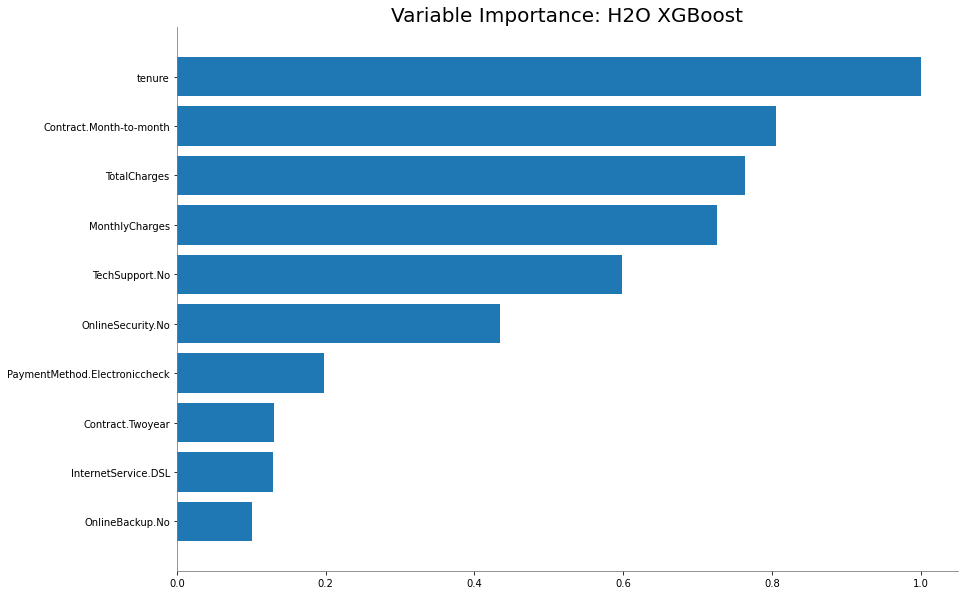

In [27]:
out.varimp_plot()

In [28]:
aml.leader.download_mojo(path = "./")

'/content/GBM_5_AutoML_20200709_153155.zip'